In [ ]:
import numpy as np
import pandas as pd
import scipy.interpolate as sip
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_excel('spline.xlsx')
data = data.rename(columns = {'Уровень воды, см на 8 часов': 'Уровень',
                              'Изменение уровня за сутки, см': 'Изменение',
                              'Температура воды, °C': 'Температура'})
data.head()

,Дата,Уровень,Изменение,Температура
0,2023-04-01,264,47,-
1,2023-04-02,274,10,1.1
2,2023-04-03,260,-14,-
3,2023-04-04,257,-3,2.8
4,2023-04-05,278,21,3


**Интерполяция** — метод используется для нахождения промежуточных значений между заданными данными. Интерполяция позволяет предсказать значения функции в точках, которые не были явно измерены или заданы.

**Сплайны** — это кусочно-полиномиальные функции, которые используются для интерполяции и аппроксимации данных.

Формула интерполяции 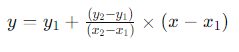

**Линейная регрессия** применяется для нахождения линейной зависимости между независимой переменной (в данном случае температура) и зависимой переменной (уровень воды). Цель линейной регрессии — найти прямую линию, которая наилучшим образом описывает зависимость между этими переменными.

# 1) Построить интерполяцию данных (температура воды) с шагом 1 час

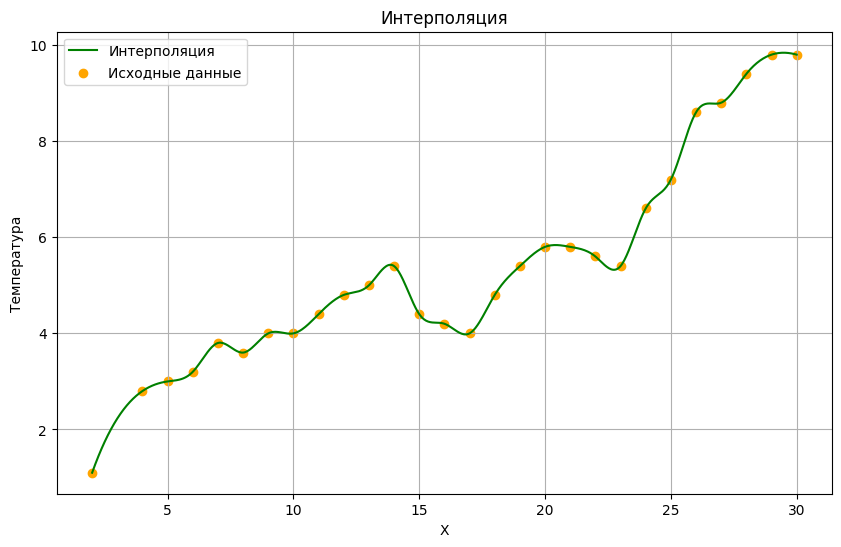

In [ ]:
x_values = np.concatenate(([2], np.arange(4, 31)))  # Создание массива значений x, включающего 2 и значения от 4 до 30
y_values = data['Температура'][data['Температура'] != '-']  # Фильтрация значений y, исключая строки с значением '-'

# Интерполяция
interpolation_func = interp1d(x_values, y_values, kind='cubic')  # Создание функции кубической интерполяции на основе x и y значений
x_interp = np.linspace(2, 30, num=672)  # Создание линейного пространства значений x от 2 до 30 с 672 точками
y_interp = interpolation_func(x_interp)  # Применение функции интерполяции к новым значениям x для получения интерполированных y значений

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_interp, y_interp, label='Интерполяция', color='green')
plt.scatter(x_values, y_values, label='Исходные данные', color='orange')
plt.title('Интерполяция')
plt.xlabel('X')
plt.ylabel('Температура')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# 2) Построить интерполяцию данных (уровень воды) с шагом 1 час

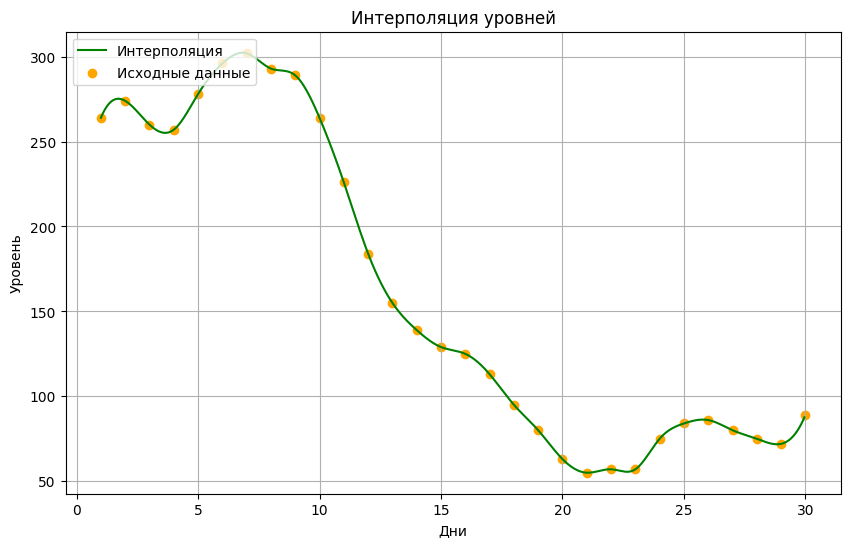

In [ ]:
days = np.arange(1, 31)
levels = data['Уровень']

# Интерполяция
interpolated_function = interp1d(days, levels, kind='cubic')  # Создание функции кубической интерполяции на основе значений дней и уровней
fine_days = np.arange(1, 30, 1/24)  # Создание линейного пространства значений дней с шагом 1/24 от 1 до 30
fine_levels = interpolated_function(fine_days)  # Применение функции интерполяции к новым значениям дней для получения интерполированных уровней

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(fine_days, fine_levels, label='Интерполяция', color='green')
plt.scatter(days, levels, label='Исходные данные', color='orange')
plt.title('Интерполяция уровней')
plt.xlabel('Дни')
plt.ylabel('Уровень')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# 3) Построить интерполяцию функции у = f(x), где у – уровень воды,  х – температура воды

In [ ]:
def del_duplicates(x_values, y_values):
    data_frame = pd.DataFrame({'X': x_values, 'y': y_values})
    averaged_data = data_frame.groupby('X', as_index=False).mean()
    return averaged_data['X'], averaged_data['y']

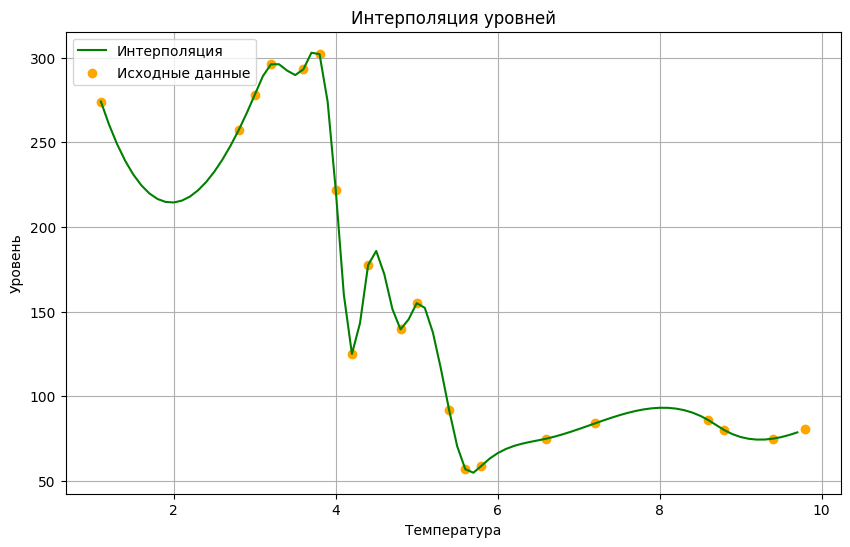

In [ ]:
# Подготовка данных
temperatures = data['Температура'][data['Температура'] != '-']  # Получение значений температур, исключая строки с значением '-'
levels = data['Уровень'][data['Температура'] != '-']  # Получение значений уровней для тех же строк, что и температуры
temperatures, levels = del_duplicates(temperatures, levels)  # Удаление дубликатов значений температур и уровней
temperatures = temperatures.astype(float)  # Преобразование значений температур в тип float
levels = levels.astype(float)  # Преобразование значений уровней в тип float

# Интерполяция
interpolated_function = interp1d(temperatures, levels, kind='cubic')  # Создание функции кубической интерполяции на основе значений температур и уровней
temperature_range = np.arange(min(temperatures), max(temperatures), 0.1)  # Создание линейного пространства значений температур с шагом 0.1 в диапазоне от минимальной до максимальной температуры
interpolated_levels = interpolated_function(temperature_range)  # Применение функции интерполяции к новому диапазону температур для получения интерполированных уровней

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(temperature_range, interpolated_levels, label='Интерполяция', color='green')
plt.scatter(temperatures, levels, label='Исходные данные', color='orange')
plt.title('Интерполяция уровней')
plt.xlabel('Температура')
plt.ylabel('Уровень')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# 4) Построить регрессионную модель у = f(x), где у – уровень воды,  х – температура воды

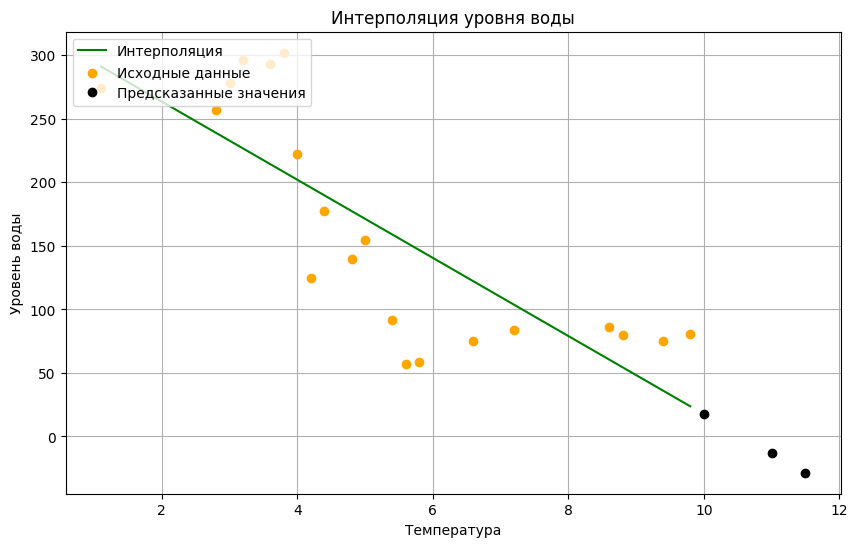

In [ ]:
# Подготовка данных
temperatures = data['Температура'][data['Температура'] != '-']  # Получение значений температур, исключая строки с значением '-'
levels = data['Уровень'][data['Температура'] != '-']  # Получение значений уровней для тех же строк, что и температуры
temperatures, levels = del_duplicates(temperatures, levels)  # Удаление дубликатов значений температур и уровней
temperatures, levels = temperatures.to_numpy(), levels.to_numpy()  # Преобразование значений температур и уровней

# Модель линейной регрессии
model = LinearRegression().fit(temperatures.reshape(-1, 1), levels)  # Обучение модели линейной регрессии на основе значений температур и уровней
temperature_range = np.linspace(min(temperatures), max(temperatures), 100)  # Создание линейного пространства значений температур из 100 точек в диапазоне от минимальной до максимальной температуры
interpolated_levels = model.predict(temperature_range.reshape(-1, 1))  # Применение модели для предсказания уровней на новом диапазоне температур

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(temperature_range, interpolated_levels, label='Интерполяция', color='green')
plt.scatter(temperatures, levels, label='Исходные данные', color='orange')

# Предсказание значений для новых точек
new_temperatures = np.array([10, 11, 11.5])  # Задание новых значений температур для предсказания
predicted_levels = model.predict(new_temperatures.reshape(-1, 1))  # Применение модели для предсказания уровней на новых значениях температур
plt.plot(new_temperatures, predicted_levels, color='black', marker='o', linestyle='None', label='Предсказанные значения')  # Добавление на график предсказанных значений в виде черных точек

plt.title('Интерполяция уровня воды')
plt.xlabel('Температура')
plt.ylabel('Уровень воды')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# 5) Рассчитать среднюю ошибку аппроксимации

In [ ]:
def mape(actual, predicted):
    actual, predicted = np.asarray(actual), np.asarray(predicted)
    error = np.abs((actual - predicted) / actual)
    return np.mean(error) * 100

mape(levels, y_pred)


44.046357566219854